<a href="https://colab.research.google.com/github/sigvehaug/Introduction-to-Python-for-Medical-Researchers/blob/master/05-Example-2-Medical_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to Python Programming for Medical Researchers, University of Bern, Sigve Haug


# 5. Example of a small medical image analysis with Python

(Use 45 minutes to go through this notebook on colab)
 
 In this notebook we will step by step see how to do a simple data analysis with Python. We will see how to
* read in in comma separated value data (text or excel files)
* use Dataframes for preprocessing and cleaning of data
* use Dataframes for descriptive statistics
* use Dataframes for plotting
* use Dataframes for hypothesis testing
* save data and results to a file

You are not supposed to understand everything right away. It is an **introductory tutorial** which intends to show how a medical researcher would work and use Python for data analysis.

In the next session we will then cover basic Python.


## Documentation

When working with Python, one always has to consult the online documentaion and google examples and answers, often given on stackoverflow. 

For this notebook we need the [online documentation](https://pandas.pydata.org/docs/reference/frame.html) for the Pandas library.


---



---



In [11]:
import imageio

In [7]:
! wget https://raw.githubusercontent.com/sigvehaug/Introduction-to-Python-for-Medical-Researchers/master/Data/ISIC_0000000.jpg

--2021-09-05 08:18:52--  https://raw.githubusercontent.com/sigvehaug/Introduction-to-Python-for-Medical-Researchers/master/Data/ISIC_0000000.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 49964 (49K) [image/jpeg]
Saving to: ‘ISIC_0000000.jpg’

ISIC_0000000.jpg    100%[===================>]  48.79K  --.-KB/s    in 0.007s  

2021-09-05 08:18:52 (6.83 MB/s) - ‘ISIC_0000000.jpg’ saved [49964/49964]



In [9]:
ls -l

total 56
-rw-r--r-- 1 root root 49964 Sep  5 08:18 ISIC_0000000.jpg
drwxr-xr-x 1 root root  4096 Sep  1 19:26 sample_data/


In [15]:
skin = imageio.imread('ISIC_0000000.jpg')
print(skin.size,skin.shape,skin.dtype)

2351622 (767, 1022, 3) uint8


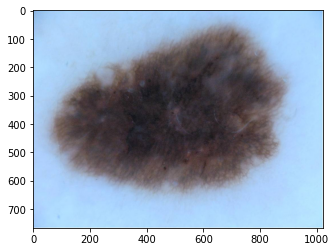

In [16]:
import matplotlib.pyplot as plt 
plt.imshow(skin) 

## Read in a small medical dataset with blood pressure measurements

Some colleagues provided this blood pressure [dataset](https://drive.google.com/file/d/1d8x5ZSwa9Yn-8J8NxiygFDaoMO8PRNWc/view?usp=sharing). Follow the link and take a look. If you don't understand what the columns mean, you can study this [webpage](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings).


In Python not all software libraries, called modules, are in memory. So we need to import those we need for our data analysis.

In [ ]:
# The data analysis module containing DataFrames
import pandas as pd
# The .....


In [ ]:
# Create a variable with the download link of the data file on google drive
# and create a dataframe varible (object) into which we read the data
url  = 'https://drive.google.com/uc?export=download&id=1d8x5ZSwa9Yn-8J8NxiygFDaoMO8PRNWc'
data = pd.read_csv(url)
data


,Age,Sex,BP_SYS,BP_DIA
0,87.76,0,#NULL!,60
1,76.22,0,150,77
2,70.28,0,115,72
3,100.28,1,183,82
4,61.62,0,#NULL!,#NULL!
...,...,...,...,...
95,93.16,1,#NULL!,#NULL!
96,62.69,0,133,72
97,79.45,1,200,70
98,86.94,1,149,54


In [ ]:
pd.set_option('max_rows',None)

In [ ]:
#data

In [ ]:
pd.set_option('max_rows',20)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     100 non-null    float64
 1   Sex     100 non-null    int64  
 2   BP_SYS  100 non-null    object 
 3   BP_DIA  100 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ KB


In [ ]:
data.describe()

,Age,Sex
count,100.000000,100.000000
mean,70.165700,0.460000
std,15.152183,0.500908
...,...,...
50%,71.945000,0.000000
75%,81.302500,1.000000
max,100.810000,1.000000


In [ ]:
round(data,2)

,Age,Sex,BP_SYS,BP_DIA
0,87.76,0,#NULL!,60
1,76.22,0,150,77
2,70.28,0,115,72
...,...,...,...,...
97,79.45,1,200,70
98,86.94,1,149,54
99,81.09,1,175,88


## Data Cleaning

We seem to have a problem with the blood pressure columns. They contain rows with #NULL. Pandas dataframes have ways to handle that.

In [ ]:
clean_data = data.replace('#NULL!',float(0))
clean_data['BP_SYS'] = pd.to_numeric(clean_data['BP_SYS'])
clean_data['BP_DIA'] = pd.to_numeric(clean_data['BP_DIA'])
clean_data['BP_SYS'] = clean_data['BP_SYS'].replace(float(0),clean_data['BP_SYS'].mean())
clean_data['BP_DIA'] = clean_data['BP_DIA'].replace(float(0),clean_data['BP_DIA'].mean())
clean_data

,Age,Sex,BP_SYS,BP_DIA
0,87.76,0,103.42,60.00
1,76.22,0,150.00,77.00
2,70.28,0,115.00,72.00
3,100.28,1,183.00,82.00
4,61.62,0,103.42,57.53
...,...,...,...,...
95,93.16,1,103.42,57.53
96,62.69,0,133.00,72.00
97,79.45,1,200.00,70.00
98,86.94,1,149.00,54.00


## Plotting

Now that we can study the summary statistics we also want to study the distributions.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f40ff328d50>,
      dtype=object)

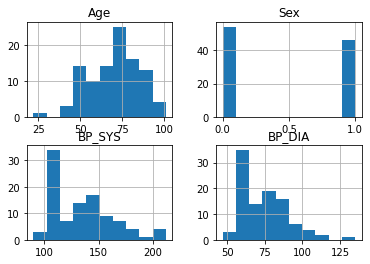

In [ ]:
# Plot all histograms fast
import matplotlib.pyplot as plt
clean_data.hist()

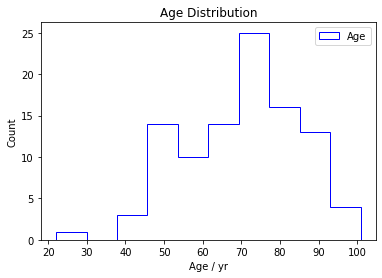

In [ ]:
# Make one plot a bit nicer
plt.figure()
ax = clean_data['Age'].plot(kind='hist',fill=False,histtype='step',color='b',label='Age')
ax.set_xlabel('Age / yr')
ax.set_ylabel('Count')
ax.set_title('Age Distribution')
plt.legend()
plt.show()

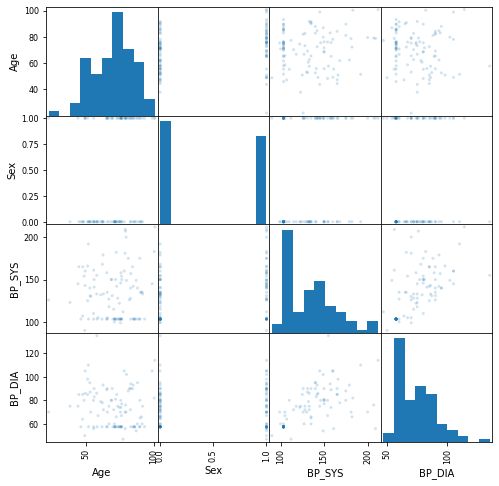

In [ ]:
# Plot all correlations fast
from pandas.plotting import scatter_matrix
scatter_matrix(clean_data, alpha=0.2, figsize=(8, 8), diagonal='hist')
plt.show()

Sex
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

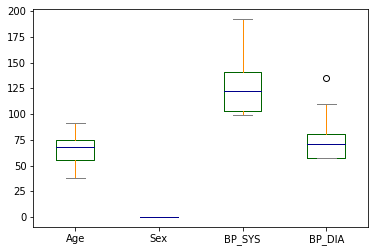

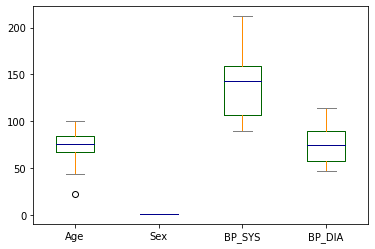

In [ ]:
# Plot the boxplots by sex
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
             medians='DarkBlue', caps='Gray')
clean_data.groupby('Sex').plot.box(color=color)

## Descriptive Statistics


In [ ]:
round(clean_data.describe(),2)

,Age,Sex,BP_SYS,BP_DIA
count,100.00,100.00,100.00,100.00
mean,70.17,0.46,133.41,73.64
std,15.15,0.50,29.43,16.66
min,22.08,0.00,90.00,47.00
25%,57.93,0.00,103.42,57.53
50%,71.94,0.00,131.50,72.00
75%,81.30,1.00,151.00,85.00
max,100.81,1.00,212.00,135.00


In [ ]:
# Histogram distributions and correlations and box plots as above

## Inferential Statistics

Normality test, test if female and males are different?

In [ ]:
from scipy import stats

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f40ffa671d0>,
      dtype=object)

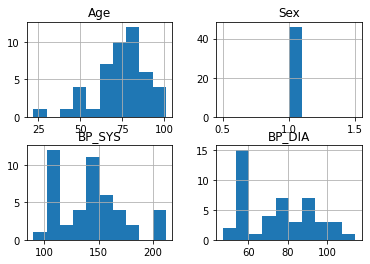

In [ ]:
male_data=clean_data[clean_data['Sex'] == 1.0]
female_data=clean_data[clean_data['Sex'] == 0.0]
male_data.hist()

In [ ]:
# Check for normality of the distributions
k2, p = stats.normaltest(male_data['BP_SYS']) # D Agostino-Pearson test
print("p-value = %1.2f" % p)
k2, p = stats.normaltest(male_data['BP_DIA']) # D Agostino-Pearson test
print("p-value = %1.2f" % p)
k2, p = stats.normaltest(female_data['BP_SYS']) # D Agostino-Pearson test
print("p-value = %1.2f" % p)
k2, p = stats.normaltest(female_data['BP_DIA']) # D Agostino-Pearson test
print("p-value = %1.2f" % p)


p-value = 0.41
p-value = 0.07
p-value = 0.05
p-value = 0.00


In [ ]:
# Check if male and females are different
print(stats.mannwhitneyu(male_data['BP_SYS'],female_data['BP_SYS']))
stats.mannwhitneyu(male_data['BP_DIA'],female_data['BP_DIA'])

MannwhitneyuResult(statistic=884.0, pvalue=0.006147669597082928)


MannwhitneyuResult(statistic=1158.5, pvalue=0.28071779180778245)

## Saving Results

Save raw and cleaned data.

In [ ]:
data.to_csv('my_rawdata.csv')
clean_data.to_csv('my_cleandata.csv')

In [ ]:
!ls -l

total 12
-rw-r--r-- 1 root root 2272 Sep  1 17:20 my_cleandata.csv
-rw-r--r-- 1 root root 2014 Sep  1 17:20 my_rawdata.csv
drwxr-xr-x 1 root root 4096 Aug 25 13:35 sample_data


Where are this data files now?

# What is next ?

This is how you would use Python for data analysis in your daily work. Now we will take a step back and look at basic Python in a more systematic way. Please go to the next [notebook](https://github.com/sigvehaug/Introduction-to-Python-Programming-For-Medical-Researchers/blob/master/3-Basic-Python.ipynb) !